# Nhóm 20HTTT2.BI.10
## Dùng mô hình hồi quy tuyến tính để dự đoán thu nhập gộp của việc bán hàng từ giá trị đơn hàng

Import dữ liệu về tổng bill (Total) và thu nhập gộp (Gross Income)

In [1]:
import pandas as pd
import statsmodels.api as sm

df = pd.read_csv('https://raw.githubusercontent.com/linhtrangishere/HTTT_TTKD/master/Mining/total_and_gross_income.csv?token=GHSAT0AAAAAACKRU52LBZ2Q6BPWWQJQFJBIZMDA3EQ')
df

,Row Labels,Total,Gross Income
0,2019-01-01,4745.1810,225.9610
1,2019-01-02,1945.5030,92.6430
2,2019-01-03,2078.1285,98.9585
3,2019-01-04,1623.6885,77.3185
4,2019-01-05,3536.6835,168.4135
...,...,...,...
99,2020-03-09,107.1420,5.1020
100,2020-03-11,591.2655,28.1555
101,2020-03-15,69.7200,3.3200
102,2020-03-22,441.7560,21.0360


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row Labels    104 non-null    object 
 1   Total         104 non-null    float64
 2   Gross Income  104 non-null    float64
dtypes: float64(2), object(1)
memory usage: 2.6+ KB


Xem xét sự tương quan giữa Total và Gross Income

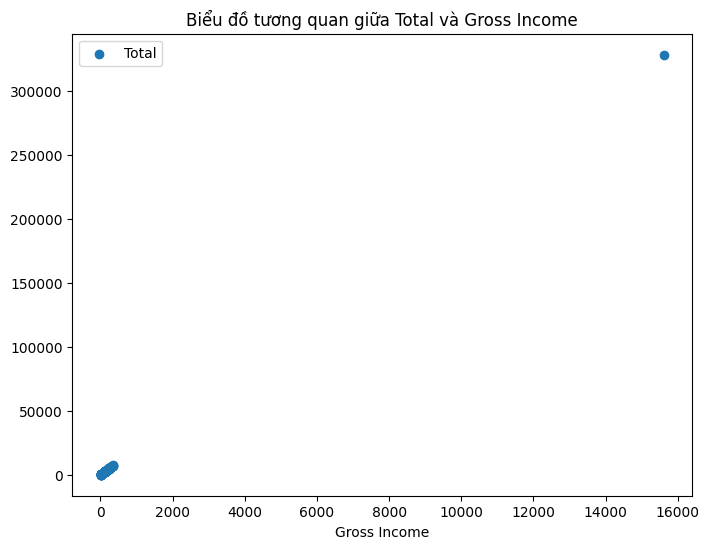

In [8]:
import matplotlib.pyplot as plt

# Tạo dữ liệu mẫu
x = df['Gross Income']
y = df['Total']

# Tạo biểu đồ
plt.figure(figsize=(8, 6))
plt.scatter(x, y, label='Total')

# Đặt tên cho trục và biểu đồ
plt.xlabel('Gross Income')
plt.title('Biểu đồ tương quan giữa Total và Gross Income')

# Hiển thị chú thích
plt.legend()

# Hiển thị biểu đồ
plt.show()


Nhận xét, mặc dù dữ liệu không có sự phân bố đồng đều và có nhiều sự chênh lệch, nhưng có thể thấy sự tương quan mạnh giữa Gross Income và Total ở những giá trị khởi đầu. Xét thử mô hình OLS.

Áp dụng mô hình OLS có hằng số và không có hằng số để kiểm tra xem mô hình có phù hợp cho việc dự đoán không, và mô hình nào sẽ tốt hơn.

Mô hình có hằng số

In [4]:
Y = df['Gross Income']
X = df['Total']
X = sm.add_constant(X)
model = sm.OLS(Y, X)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:           Gross Income   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.710e+33
Date:                Wed, 20 Dec 2023   Prob (F-statistic):               0.00
Time:                        15:24:56   Log-Likelihood:                 2829.7
No. Observations:                 104   AIC:                            -5655.
Df Residuals:                     102   BIC:                            -5650.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.279e-13   3.73e-14     -3.431      0.0

Mô hình không có hằng số

In [5]:
Y = df['Gross Income']
X = df['Total']
model = sm.OLS(Y, X)
result = model.fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:           Gross Income   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          8.440e+32
Date:                Wed, 20 Dec 2023   Prob (F-statistic):                        0.00
Time:                        15:26:05   Log-Likelihood:                          2790.4
No. Observations:                 104   AIC:                                     -5579.
Df Residuals:                     103   BIC:                                     -5576.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Nhận thấy, cả hai mô hình đều đưa ra giá trị R-squared rất cao, đồng thời p-value cho biến độc lập là rất thấp, cho thấy sự chắc chắn về ảnh hưởng của Total đối với Gross Income. Tuy nhiên, mô hình 1 có standard errors (độ lệch chuẩn) của Total nhỏ hơn so với mô hình 2 nên sẽ sử dụng mô hình có constant để dự đoán.

Áp dụng mô hình thứ 1, ta sẽ có công thức: Gross Income =   0.0476*Total - 1.279e-13

---
Từ công thức này, ta có thể dự đoán được giá trị Gross Income với bất kỳ giá trị Total nhận được bằng cách thế giá trị Total này vào. Giả sử, khi giá trị Total là 90000 thì giá trị Gross Income thu được là 4284.


In [6]:
0.0476*90000 - 1.279e-13

4284.0